# Linear Regression: Retraining and Regularization

In this task, we will see examples of how linear models are overtrained, we will analyze why this happens, and we will find out how to diagnose and control overfitting.

In all cells where a comment with instructions is written, you need to write code that executes these instructions. The remaining cells with code (without comments) just need to be executed. In addition, the assignment requires you to answer questions; Answers must be entered after the highlighted word "__Answer:__".

In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


We will work with the __"bikes_rent.csv"__ dataset, in which calendar information and weather conditions characterizing automated bicycle rental points, as well as the number of rentals on that day, are recorded by day. The latter we will predict; thus, we will solve the regression problem.

### Getting to know your data

## Task 1

Load the dataset using the __pandas.read_csv__ function into the __df__ variable. Print the first 5 lines to make sure the data is read correctly:

In [281]:
df = pd.read_csv('bikes_rent.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


For each rental day, the following characteristics are known:
* _season_: 1 - spring, 2 - summer, 3 - autumn, 4 - winter
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: 1 to 12
* _holiday_: 0 - no holiday, 1 - there is a holiday
* _weekday_: 0 to 6
* _workingday_: 0 - non-working day, 1 - working day
* _weathersit_: weather favorableness rating from 1 (clear, clear day) to 4 (rain, fog)
* _temp_: temperature in Celsius
* _atemp_: felt temperature in Celsius
* _hum_: humidity
* _windspeed(mph)_: wind speed in miles per hour
* _windspeed(ms)_: wind speed in meters per second
* _cnt_: number of rented bicycles (this is the target attribute, we will predict it)

So, we have real, binary and nominal (ordinal) features, and all of them can be worked with as real ones. You can also work with nominal characteristics as with real ones, because the order is specified on them. Let's look at the graphs to see how the target feature depends on the others

Build graphs of attributes depending on the number of trips. In other words, you need to build 12 graphs. Each one should show the dependence of the next attribute on the **cnt** variable.

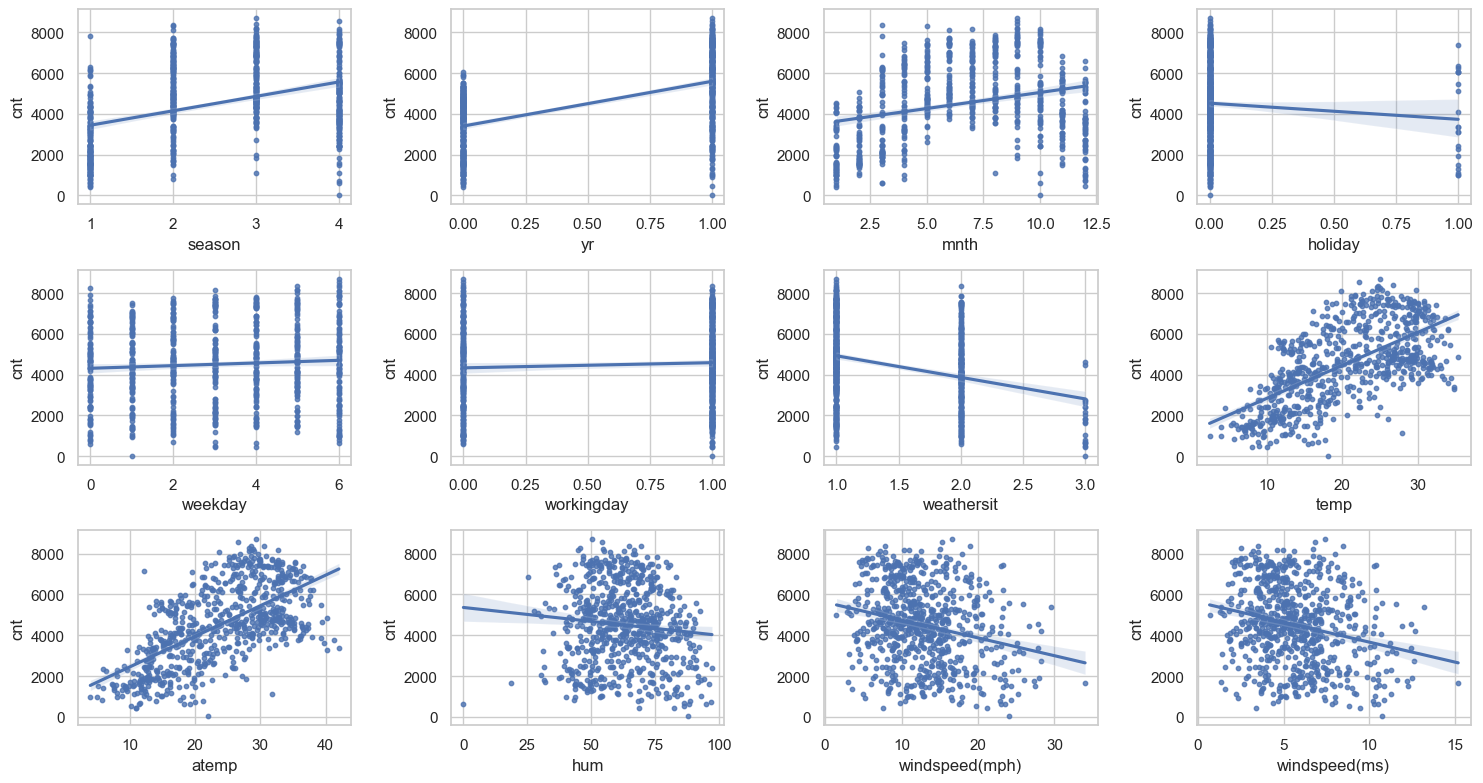

In [282]:
sns.set(style='whitegrid', color_codes=True) # setting graphs style
attributes = list(df.columns[0:-1])
fig = plt.figure(figsize=(15,8))
i = 1

for attribute in attributes:
    ax = fig.add_subplot(3,4,i)
    sns.regplot(x=attribute, y='cnt', data=df, ax=ax, scatter_kws={'s':10})
    #sns.scatterplot(x=attribute, y='cnt', data=df)
    i += 1

plt.tight_layout()

__Questions:__
1. What is the nature of the dependence of the number of rentals on the month?
1. Indicate one or two characteristics on which the number of rentals most likely depends linearly

<Axes: xlabel='mnth', ylabel='cnt'>

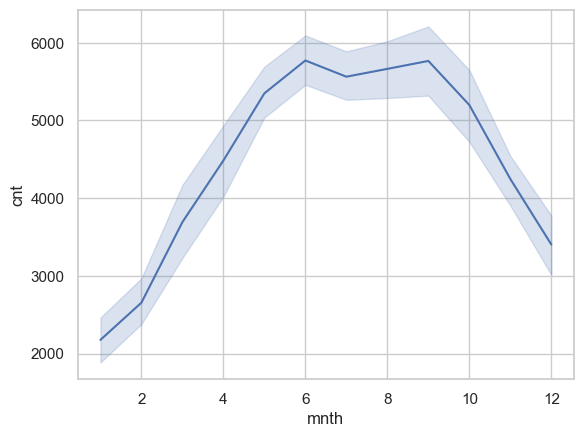

In [283]:
sns.lineplot(x='mnth', y='cnt', data=df)

Answer 1: There is a quadratic dependence of the number of rentals on the month

Answer 2: There is a linear dependence of the number of rentals on the temperature in Celsius and the felt temperature in Celsius

## Task 2

Let's more strictly evaluate the level of linear dependence between the features and the target variable. A good measure of the linear relationship between two vectors is the Pearson correlation. We've had to deal with her before. To calculate it in pandas, you can use the dataframe methods: corr and corrwith.

Calculate the correlations of all features except the last one with the last one using the `corrwith` method.

In [284]:
df_ind = df.columns[:-1]
df[df_ind].corrwith(df["cnt"])

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64

The sample contains features that correlate with the target, which means the problem can be solved using linear methods.

The graphs show that some features are similar to each other. Therefore, let's also calculate the correlations between real features.

## Task 3

Calculate pairwise correlations between the attributes temp, atemp, hum, windspeed(mph), windspeed(ms) and cnt
using the corr method:

In [285]:
correlation_matrix = df.corr()
correlation_matrix

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


<Axes: >

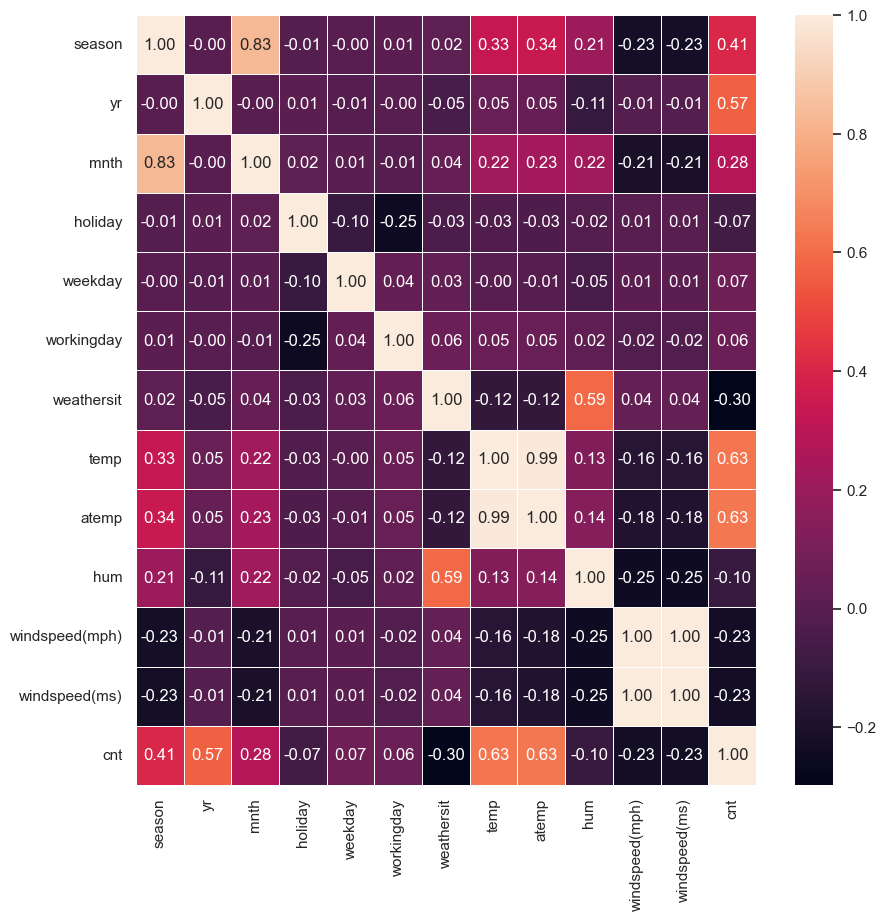

In [286]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

On the diagonals, as expected, there are 1. However, there are two more pairs of highly correlated columns in the matrix: temp and atemp (correlated by nature) and two windspeed (because it is simply a conversion of one unit to another). We will see later that this fact has a negative impact on training a linear model.

Finally, let’s look at the average features (the mean method) to estimate the scale of features and the proportion of 1 for binary features.

In [287]:
df_mean = df.mean()
# for binary feautres mean shows the fraction of 1 in this column

## Task 4

Output averages of features

In [288]:
df_mean

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Features have different scales, which means that for further work it is better for us to normalize the object-feature matrix.

### Problem one: collinear features

So, in our data, one feature duplicates another, and there are two more that are very similar. Of course, we could immediately remove duplicates, but let's see how the model would train if we didn't notice this problem.

First, let's carry out scaling, or standardization of features: from each feature, subtract its average and divide by the standard deviation. This can be done using the scale method.

In addition, you need to mix the sample, this is required for cross-validation.

In [289]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [290]:
df_shuffled = shuffle(df, random_state=42) # random_state is a random seed
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Let's train linear regression on our data and look at the feature weights.

In [291]:
from sklearn.linear_model import LinearRegression

## Task 5

Create a linear regressor object, train it on all data, and output the model weights (the weights are stored in the `coef_` variable of the regressor class). You can output pairs (feature name, weight) using the `zip` function built into the python language. The names of the features are stored in the `df.columns` variable.


In [292]:
regressor = LinearRegression().fit(X, y)
list(zip(df.columns, regressor.coef_))

[('season', 570.863641661725),
 ('yr', 1021.9604245185086),
 ('mnth', -141.3006331900142),
 ('holiday', -86.75760471139698),
 ('weekday', 137.2272583151452),
 ('workingday', 56.38980357474366),
 ('weathersit', -330.2271825899341),
 ('temp', 367.4799030832653),
 ('atemp', 585.5521797658965),
 ('hum', -145.6155228231448),
 ('windspeed(mph)', 12454356291009.727),
 ('windspeed(ms)', -12454356291208.188)]

We see that the weights for linearly dependent features are significantly greater in absolute value than for other features. To understand why this happened, let us recall the analytical formula used to calculate the weights of a linear model in the least squares method:

$$w = (X^TX)^{-1} X^T y$$

If $X$ has collinear (linearly dependent) columns, the matrix $X^TX$ becomes singular and the formula is no longer valid. The more dependent the features, the smaller the determinant of this matrix and the worse the approximation $Xw \approx y$. This situation is called the _multicollinearity problem_.

This did not happen with the pair (temp, atemp) of slightly less correlated variables, but in practice it is always worth carefully monitoring the coefficients for similar characteristics.

In order to solve the problem of multicollinearity, you need to use a regularizer. The $L_1$ or $L_2$ norm of weights multiplied by the regularization coefficient $\alpha$ is added to the optimized functional. In the first case the method is called Lasso, and in the second it is called Ridge.

### Task 6
Let's try to train linear models with $L_1$ and $L_2$ regularization, and then compare their weights. Train the Ridge and Lasso regressors with the default parameters and verify that the weight problem is resolved.

Train a linear model with $L_1$-regularization (Lasso class) and output weights
\begin{align}
       lasso(\mathbf{x},h_\omega) = \frac{1}{m} \sum_{i=1}^m (\mathbf{\omega}^{T} \cdot \mathbf{x}^{(i)}-y^{(i)})^2 + \alpha \sum_{i=1}^n \mid{\omega_i}\mid ->min
\end{align}

In [293]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.01)
lasso_regressor = lasso.fit(X, y)
list(zip(df.columns, lasso_regressor.coef_))


[('season', 565.8203680344196),
 ('yr', 1020.3406075451142),
 ('mnth', -134.4059930589025),
 ('holiday', -86.6933353823502),
 ('weekday', 138.34178084851774),
 ('workingday', 55.945973205301776),
 ('weathersit', -332.69927432554397),
 ('temp', 372.4134136547166),
 ('atemp', 580.6345091628926),
 ('hum', -144.99533064129716),
 ('windspeed(mph)', -198.08863723940627),
 ('windspeed(ms)', -3.837859988283275e-08)]

Train a linear model with $L_2$-regularization (Ridge class) and output weights
\begin{align}
       ridge(\mathbf{x},h_\omega) = \frac{1}{m} \sum_{i=1}^m (\mathbf{\omega}^{T} \cdot \mathbf{x}^{(i)}-y^{(i)})^2 + \alpha \frac{1}{2} \sum_{i=1}^n {\omega_i}^2->min
\end{align}

In [294]:
ridge = Ridge(alpha=0.01)
ridge_regressor = ridge.fit(X, y)
list(zip(df.columns, ridge_regressor.coef_))

[('season', 565.8462833818473),
 ('yr', 1020.3366888023058),
 ('mnth', -134.43595917886444),
 ('holiday', -86.69328038304053),
 ('weekday', 138.35655633853602),
 ('workingday', 55.955212463667934),
 ('weathersit', -332.69231129702683),
 ('temp', 371.3205731054473),
 ('atemp', 581.7243722010388),
 ('hum', -145.01648815249553),
 ('windspeed(mph)', -99.03781797568485),
 ('windspeed(ms)', -99.03782528150191)]

### Task 7

Unlike $L_2$-regularization, $L_1$ resets the weights to zero for some features. Let's observe how the weights change as the regularization coefficient $\alpha$ increases.

For each coefficient value from `alphas`, train a `Lasso` regressor and write the weights to the `coefs_lasso` list, and then train `Ridge` and write the weights to the `coefs_ridge` list. Convert the resulting lists to `np.array`.

In [295]:
alphas = np.arange(1, 500, 50)

coefs_lasso = [Lasso(alpha=alpha).fit(X, y).coef_ for alpha in alphas]
coefs_ridge = [Ridge(alpha=alpha).fit(X, y).coef_ for alpha in alphas]

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

for alpha, coef_lasso, coef_ridge in zip(alphas, coefs_lasso, coefs_ridge):
    print(f'alpha: {alpha}')
    print(f'coef_lasso: {coef_lasso}')
    print(f'coef_ridge: {coef_ridge}')
    print('=' * 100)


alpha: 1
coef_lasso: [ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
  1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
  5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80514042e-08]
coef_ridge: [ 563.06457225 1018.94837879 -131.87332028  -86.746098    138.00511118
   55.90311038 -332.3497885   386.45788919  566.34704706 -145.0713273
  -99.25944108  -99.25944115]
alpha: 51
coef_lasso: [ 4.10969632e+02  9.77019409e+02 -0.00000000e+00 -5.34489688e+01
  9.19434374e+01  1.75372118e+01 -3.18125568e+02  3.22829934e+02
  6.10031512e+02 -9.10689615e+01 -1.45066095e+02 -2.29892889e-08]
coef_ridge: [ 461.1786324   954.30774189  -41.56545001  -84.91347027  126.60366663
   54.2516911  -313.27515141  458.90147709  481.44350031 -151.29101033
 -101.62731482 -101.62731483]
alpha: 101
coef_lasso: [ 3.70077089e+02  9.35945490e+02  0.00000000e+00 -1.21619360e+01
  4.88886342e+01  0.00000000e+00 -3.08805664e+02  2.69417263e+02
  6.32502623e+02 -2.75042876e+01 -9.37749037e

Analyze the dynamics of the weights as the regularization parameter increases:

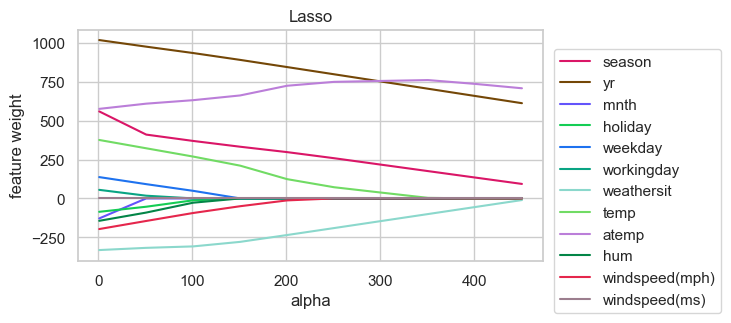

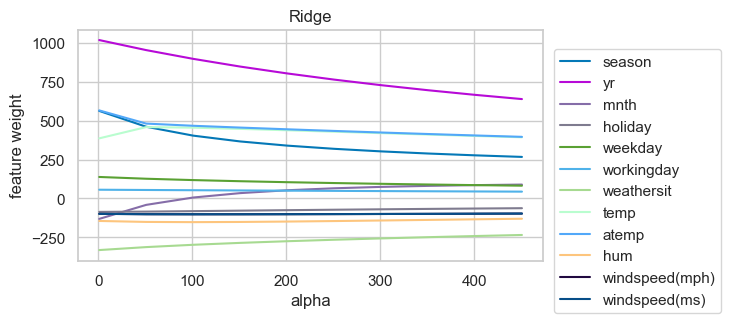

In [296]:
plt.figure(figsize=(6, 3))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(6, 3))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Analyze the graphs and answer the following questions.

1. Which regularizer (Ridge or Lasso) reduces weights more aggressively for the same alpha?
2. What happens to the Lasso scales if alpha is made very large? Explain why this happens.
3. Is it possible to say that `Lasso` excludes one of the `windspeed` features for any value of `alpha > 0`? And Ridge? It is believed that the regularizer excludes a feature if its coefficient is less than $10^{-3}$.
4. Which regularizer is suitable for selecting uninformative features?

1. The Lasso regularizer (L1) is more aggressive compared to the Ridge regularizer (L2) for the same value of the alpha coefficient. The main difference between L1 and L2 is how they penalize the magnitude of the weights. L1 uses the sum of the absolute values of the weights, which leads to the fact that some weights may become zero. In contrast, L2 penalizes the squared weights, which makes it less aggressive in changing the values of the weights, especially when the values of the weights are large.

2. If the value of the parameter alpha (α) in L1 is large, this will lead to a stronger penalty for large values of weights (coefficients) in the model. A large alpha value in L1 promotes weight thinning, and, some weights may become zero. With a large value of alpha, the model becomes simpler, as it takes into account fewer features and sets some of their weights to zero. This property of L1 is known as "feature selection".

3. In L1 (Lasso), excluding one of the windspeed features may be expected that for large values of the alpha parameter, some weights will be set to zero, which effectively excludes the corresponding features from the model. We have two windspeed signatures and it is simply a conversion of one unit to another, there is a possibility that Lasso may exclude one of them.
On the other hand, in L2 (Ridge), there is usually no situation where the weights or coefficients are exactly zero. Ridge penalizes the weights for their magnitude, but does not exclude any of them entirely, as L1 does.
For L1 (Lasso), it can be expected that if the coefficient for a certain feature becomes smaller than the value of the order of 10^(-3) at a large value of the alpha parameter, then this feature can be excluded from the model. A large value of alpha makes the weight penalty very large, which favors setting the coefficients to zero or small values.

4. With the same value of the alpha coefficient, L1 can lead to larger changes in weights and even setting some weights to zero, which allows us to automatically select the most important features.

### Task 8

Next we will work with `Lasso`.

So, we see that when alpha changes, the model selects feature coefficients differently. We need to choose the best alpha.

To do this, firstly, we need a quality metric. We will use as a metric the optimized functionality of the least squares method itself, that is, `Mean Square Error`.

Secondly, you need to understand on what data this metric should be calculated. We cannot select `alpha` based on the MSE value on the training set, because then we will not be able to evaluate how the model will make predictions on data that is new to it. If we choose one division of the sample into training and testing (this is called a holdout), then we will tune in to specific “new” data and can again retrain. Therefore, we will do several sample splits, try different alpha values on each, and then average the MSE. The most convenient way to do such partitions is by cross-validation, that is, divide the sample into $K$ parts, and each time take one of them as a test one, and from the remaining blocks make up a training sample.

Doing cross-validation for regression in sklearn is quite simple: for this there is a special regressor, __LassoCV__, which takes a list of alpha as input and for each of them calculates the MSE for cross-validation. After training (if you leave the cv=3 parameter as default), the regressor will contain the variable __mse\_path\___, a matrix of size len(alpha) x k, k = 3 (the number of blocks in cross-validation), containing the MSE values on the test for the corresponding runs . In addition, the alpha\_ variable will store the selected value of the regularization parameter, and coef\_, traditionally, will store the trained weights corresponding to this alpha_.

Note that the regressor can change the order in which it traverses alphas; For comparison with the MSE matrix, it is better to use the alphas_ regressor variable.

Train the `LassoCV` regressor on all regularization parameters from alpha. Plot the row-averaged `MSE` as a function of `alpha` (use the `create_plot` function for this).

Print the selected `alpha` as well as the feature-coefficient pairs for the trained vector of coefficients.

In [297]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    sns.set()
    plt.figure(figsize=size)

    x, y = zip(*data)
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    sns.set(style='whitegrid', color_codes=True)
    plt.grid()
    plt.show()

In [298]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3).fit(X, y)
print('Alpha: ', regressor.alpha_)
list(zip(df.columns, regressor.coef_))


Alpha:  6


[('season', 532.0189828413535),
 ('yr', 1015.0602226430595),
 ('mnth', -100.03952614356629),
 ('holiday', -83.29395987529904),
 ('weekday', 132.50446549095795),
 ('workingday', 51.557085614073735),
 ('weathersit', -330.5598567399817),
 ('temp', 370.67985503003405),
 ('atemp', 581.396931065498),
 ('hum', -140.00740550068844),
 ('windspeed(mph)', -191.77140847135036),
 ('windspeed(ms)', -2.6854702314758792e-08)]

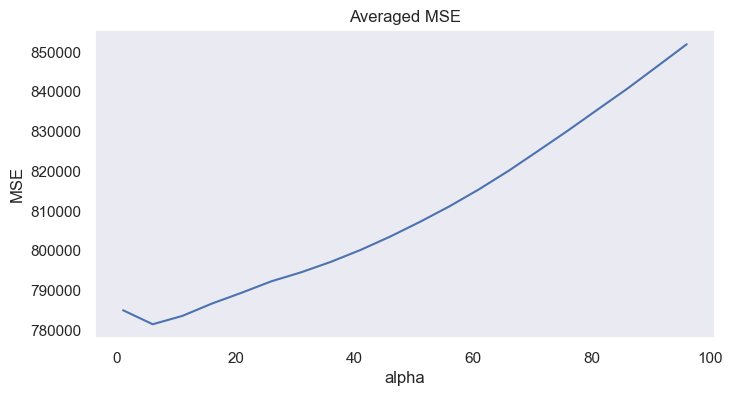

In [299]:
averaged_mse = list(regressor.mse_path_.mean(axis=1))
alphas = list(regressor.alphas_)

create_plot(data=list(zip(alphas, averaged_mse)), 
            title='Averaged MSE', 
            xlabel='alpha', 
            ylabel='MSE',
            figsize=(8,4))

So, we have chosen some regularization parameter. Let's see what alpha we would choose if we divided the sample only once into training and test, that is, consider the MSE trajectories corresponding to individual sampling blocks.

### Task 9

Print the `alpha` values corresponding to the `MSE` minima at each partition (that is, per column).
In three separate plots, visualize the `mse_path_` columns.


In [300]:
print('Alphas with minimum MSE:')
print(f'Alpha = {regressor.alphas_[regressor.mse_path_[:, 0].argmin()]}, MSE = {regressor.mse_path_[:, 0].min()}')
print(f'Alpha = {regressor.alphas_[regressor.mse_path_[:, 1].argmin()]}, MSE = {regressor.mse_path_[:, 1].min()}')
print(f'Alpha = {regressor.alphas_[regressor.mse_path_[:, 2].argmin()]}, MSE = {regressor.mse_path_[:, 2].min()}')

Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052245
Alpha = 1, MSE = 799433.1673691699
Alpha = 51, MSE = 796979.8955193633


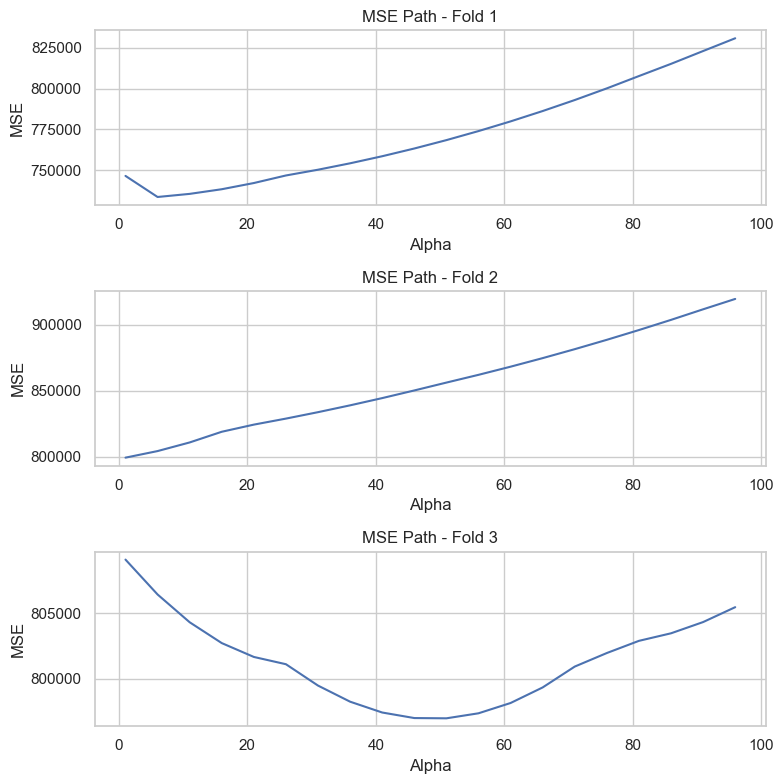

In [301]:
alphas = regressor.alphas_
mse1 = regressor.mse_path_[:,0]
mse2 = regressor.mse_path_[:,1]
mse3 = regressor.mse_path_[:,2]

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(3,1,1)
ax1.set(xlabel='Alpha', ylabel='MSE', title='MSE Path - Fold 1')
ax1.plot(alphas, mse1)
ax2 = fig.add_subplot(3,1,2)
ax2.set(xlabel='Alpha', ylabel='MSE', title='MSE Path - Fold 2')
ax2.plot(alphas, mse2)
ax3 = fig.add_subplot(3,1,3)
ax3.set(xlabel='Alpha', ylabel='MSE', title='MSE Path - Fold 3')
ax3.plot(alphas, mse3)

plt.tight_layout()
plt.show()

On each partition, the optimal value of `alpha` is different, and it corresponds to a large MSE on other partitions. It turns out that we are tuned to specific training and control samples. When choosing `alpha` for cross-validation, we are choosing something “in the middle” that will give an acceptable metric value across different sample splits.

### Task 10

Finally, as is customary in data analysis, let's interpret the result. Answer the following questions.

#### Question 1

In the last trained model, select 4 features with the largest (positive) coefficients (and write them down), look at the visualizations of the `cnt` dependencies on these features that we drew in the “Getting to know the data” block. Is an increasing linear dependence of `cnt` on these features visible in the graphs? Is it logical to say (from common sense) that the higher the value of these features, the more people will want to take bicycles?

__Answer:__

In [303]:
sorted_coef = sorted(list(zip(df.columns, regressor.coef_)), key=lambda x: abs(x[1]), reverse=True)
sorted_coef[0:]

[('yr', 1015.0602226430595),
 ('atemp', 581.396931065498),
 ('season', 532.0189828413535),
 ('temp', 370.67985503003405),
 ('weathersit', -330.5598567399817),
 ('windspeed(mph)', -191.77140847135036),
 ('hum', -140.00740550068844),
 ('weekday', 132.50446549095795),
 ('mnth', -100.03952614356629),
 ('holiday', -83.29395987529904),
 ('workingday', 51.557085614073735),
 ('windspeed(ms)', -2.6854702314758792e-08)]

<Axes: xlabel='season', ylabel='cnt'>

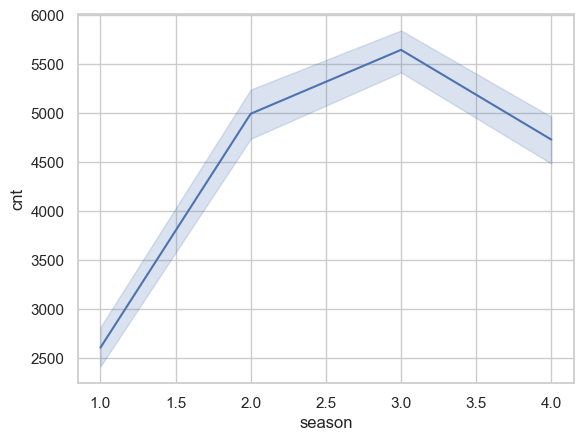

In [304]:
sns.lineplot(x='season', y='cnt', data=df)

With positive coefficients, it can be assumed that as the values of these characteristics (year, felt temperature, season and temperature) increase, the number of bicycles will also increase. For example, the effect of year (yr) may be related to the increasing popularity of bicycle rental over the years.

If season is defined as 1 - spring, 2 - summer, 3 - autumn, 4 - winter, then the value of the coefficient in 532.02 looks unlogically, because usually in warm weather and summer more people are interested in active recreation, including trips on bicycles.
If we look at the graph, we do not see an increasing linear dependence of the number of bicycles on the season, it is rather quadratic.

#### Question 2

Select 3 features with the largest absolute negative coefficients (and write them down), look at the corresponding visualizations. Is there a decreasing linear relationship visible? Is it logical to say that the greater the magnitude of these signs, the less people will want to take bicycles?

__Answer:__

In [305]:
sorted_coef = sorted(list(zip(df.columns, regressor.coef_)), key=lambda x: x[1], reverse=False)
sorted_coef[0:3]

[('weathersit', -330.5598567399817),
 ('windspeed(mph)', -191.77140847135036),
 ('hum', -140.00740550068844)]

<Axes: xlabel='weathersit', ylabel='cnt'>

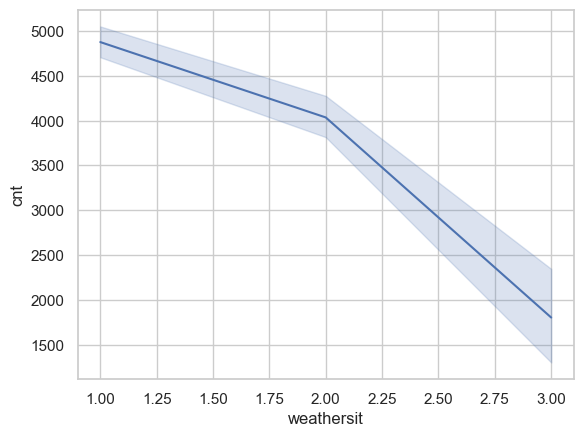

In [306]:
sns.lineplot(x='weathersit', y='cnt', data=df)

The general effect of weather conditions such as humidity, wind speed and others can determine the demand for bicycles. Conditions that make cycling less comfortable or unsafe can lead to fewer cyclists.
We can observe a negative linear dependence of the number of bicycles on the weather.

#### Question 3

Write down the characteristics with coefficients close to zero (< 1e-3). Why do you think the model excluded them from the model (look at the graphs again)? Is it true that they have no effect on the demand for bicycles?

__Ответ:__

In [307]:
sorted_coef = filter(lambda x: abs(x[1]) < 0.01, list(zip(df.columns, regressor.coef_)))
list(sorted_coef)

[('windspeed(ms)', -2.6854702314758792e-08)]

The value of the coefficient for the windspeed(ms) feature is very close to zero (-2.6854702314758792e-08). This may indicate that this feature is probably a linear combination of another feature, namely windspeed(mph), and therefore does not contribute significantly to the number of bicycles.
The model excluded this feature because it has a high degree of correlation with another feature (in this case, wind in meters per second and miles per hour). If two features have similar information, the model may believe that it can determine the dependency on one of them, and so the other becomes redundant. In this context, it can be assumed that the wind speed in meters per second can be sufficiently expressed as a speed in miles per hour.

### Conclusion
So, we looked at how we can monitor the adequacy of a linear model, how to select features, and how to competently, if possible, without adjusting to any specific piece of data, select the regularization coefficient.

It is worth noting that using cross-validation it is convenient to select only a small number of parameters (1, 2, maximum 3), because for each acceptable combination of them we have to train the model several times. This process takes a lot of time, especially if you need to train on large amounts of data.